# Person Of Interest Identifier in Enron Dataset

## This notebook contains all my code and documentation for the project, with some exploration of the dataset.

### About Enron data
In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives. In this project, I build a person of interest identifier based on financial and email data made public as a result of the Enron scandal. The given data consists of hand-generated list of persons of interest in the fraud case, which means individuals who were indicted, reached a settlement, or plea deal with the government, or testified in exchange for prosecution immunity. 


### Let's load the given dataset in a pandas dataframe

In [165]:
### Loading the dictionary containing the dataset
import pickle
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [166]:
import pandas as pd
data = pd.DataFrame.from_dict(data_dict)
data = data.T

In [167]:
data.head()

bonus deferral_payments deferred_income director_fees  \
ALLEN PHILLIP K     4175000           2869717        -3081055           NaN   
BADUM JAMES P           NaN            178980             NaN           NaN   
BANNANTINE JAMES M      NaN               NaN           -5104           NaN   
BAXTER JOHN C       1200000           1295738        -1386055           NaN   
BAY FRANKLIN R       400000            260455         -201641           NaN   

                                 email_address exercised_stock_options  \
ALLEN PHILLIP K        phillip.allen@enron.com                 1729541   
BADUM JAMES P                              NaN                  257817   
BANNANTINE JAMES M  james.bannantine@enron.com                 4046157   
BAXTER JOHN C                              NaN                 6680544   
BAY FRANKLIN R             frank.bay@enron.com                     NaN   

                   expenses from_messages from_poi_to_this_person  \
ALLEN PHILLIP K       13868          2195                      47   
BADUM JAMES P          3486           NaN                     NaN   
BANNANTINE JAMES M    56301            29                      39   
BAXTER JOHN C         11200           NaN                     NaN   
BAY FRANKLIN R       129142           NaN                     NaN   

                   from_this_person_to_poi        ...         \
ALLEN PHILLIP K                         65        ...          
BADUM JAMES P                          NaN        ...          
BANNANTINE JAMES M                       0        ...          
BAXTER JOHN C                          NaN        ...          
BAY FRANKLIN R                         NaN        ...          

                   long_term_incentive    other    poi restricted_stock  \
ALLEN PHILLIP K                 304805      152  False           126027   
BADUM JAMES P                      NaN      NaN  False              NaN   
BANNANTINE JAMES M                 NaN   864523  False          1757552   
BAXTER JOHN C                  1586055  2660303  False          3942714   
BAY FRANKLIN R                     NaN       69  False           145796   

                   restricted_stock_deferred  salary shared_receipt_with_poi  \
ALLEN PHILLIP K                      -126027  201955                    1407   
BADUM JAMES P                            NaN     NaN                     NaN   
BANNANTINE JAMES M                   -560222     477                     465   
BAXTER JOHN C                            NaN  267102                     NaN   
BAY FRANKLIN R                        -82782  239671                     NaN   

                   to_messages total_payments total_stock_value  
ALLEN PHILLIP K           2902        4484442           1729541  
BADUM JAMES P              NaN         182466            257817  
BANNANTINE JAMES M         566         916197           5243487  
BAXTER JOHN C              NaN        5634343          10623258  
BAY FRANKLIN R             NaN         827696             63014  

[5 rows x 21 columns]

### Some data stats

In [168]:
print "Total number of data points: " + str(data.shape[0])
print "Total number of poi: " + str(data['poi'].value_counts()[1])
print "Total number of non poi: " + str(data['poi'].value_counts()[0])

Total number of data points: 146
Total number of poi: 18
Total number of non poi: 128


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

Since, most of the  features are of type object, let's convert them to numeric.

In [170]:
## Leaving out email_address column
enron_data = data.iloc[:,data.columns!='email_address'].apply(lambda x: pd.to_numeric(x, errors='force'))
enron_data['email_address'] = data['email_address']
enron_data.head()

bonus  deferral_payments  deferred_income  \
ALLEN PHILLIP K     4175000.0          2869717.0       -3081055.0   
BADUM JAMES P             NaN           178980.0              NaN   
BANNANTINE JAMES M        NaN                NaN          -5104.0   
BAXTER JOHN C       1200000.0          1295738.0       -1386055.0   
BAY FRANKLIN R       400000.0           260455.0        -201641.0   

                    director_fees  exercised_stock_options  expenses  \
ALLEN PHILLIP K               NaN                1729541.0   13868.0   
BADUM JAMES P                 NaN                 257817.0    3486.0   
BANNANTINE JAMES M            NaN                4046157.0   56301.0   
BAXTER JOHN C                 NaN                6680544.0   11200.0   
BAY FRANKLIN R                NaN                      NaN  129142.0   

                    from_messages  from_poi_to_this_person  \
ALLEN PHILLIP K            2195.0                     47.0   
BADUM JAMES P                 NaN                      NaN   
BANNANTINE JAMES M           29.0                     39.0   
BAXTER JOHN C                 NaN                      NaN   
BAY FRANKLIN R                NaN                      NaN   

                    from_this_person_to_poi  loan_advances  \
ALLEN PHILLIP K                        65.0            NaN   
BADUM JAMES P                           NaN            NaN   
BANNANTINE JAMES M                      0.0            NaN   
BAXTER JOHN C                           NaN            NaN   
BAY FRANKLIN R                          NaN            NaN   

                               ...                  other    poi  \
ALLEN PHILLIP K                ...                  152.0  False   
BADUM JAMES P                  ...                    NaN  False   
BANNANTINE JAMES M             ...               864523.0  False   
BAXTER JOHN C                  ...              2660303.0  False   
BAY FRANKLIN R                 ...                   69.0  False   

                    restricted_stock  restricted_stock_deferred    salary  \
ALLEN PHILLIP K             126027.0                  -126027.0  201955.0   
BADUM JAMES P                    NaN                        NaN       NaN   
BANNANTINE JAMES M         1757552.0                  -560222.0     477.0   
BAXTER JOHN C              3942714.0                        NaN  267102.0   
BAY FRANKLIN R              145796.0                   -82782.0  239671.0   

                    shared_receipt_with_poi  to_messages  total_payments  \
ALLEN PHILLIP K                      1407.0       2902.0       4484442.0   
BADUM JAMES P                           NaN          NaN        182466.0   
BANNANTINE JAMES M                    465.0        566.0        916197.0   
BAXTER JOHN C                           NaN          NaN       5634343.0   
BAY FRANKLIN R                          NaN          NaN        827696.0   

                    total_stock_value               email_address  
ALLEN PHILLIP K             1729541.0     phillip.allen@enron.com  
BADUM JAMES P                257817.0                         NaN  
BANNANTINE JAMES M          5243487.0  james.bannantine@enron.com  
BAXTER JOHN C              10623258.0                         NaN  
BAY FRANKLIN R                63014.0         frank.bay@enron.com  

[5 rows x 21 columns]

### Count of missing values for each feature in the dataset

In [171]:
enron_data.isnull().sum().sort_values(ascending=False)

loan_advances                142
director_fees                129
restricted_stock_deferred    128
deferral_payments            107
deferred_income               97
long_term_incentive           80
bonus                         64
from_this_person_to_poi       60
from_poi_to_this_person       60
from_messages                 60
shared_receipt_with_poi       60
to_messages                   60
other                         53
salary                        51
expenses                      51
exercised_stock_options       44
restricted_stock              36
total_payments                21
total_stock_value             20
poi                            0
email_address                  0
dtype: int64

Filling non-null values with zero.

In [172]:
enron_data.fillna(0,inplace=True)

## Let's explore some of the features

In [173]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns


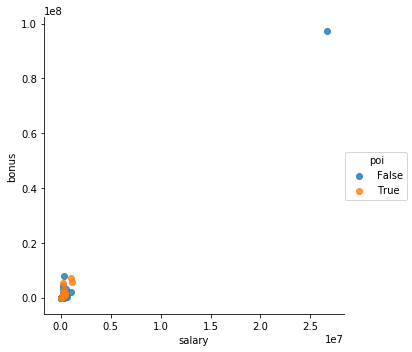

In [174]:
fig1 = sns.lmplot(x='salary',y='bonus',fit_reg=False,hue='poi',data=enron_data)

We can see that we have one outlier here. Let's check other variables first.

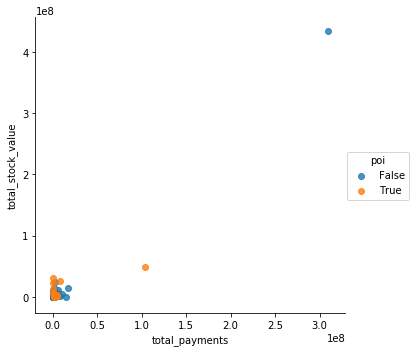

In [175]:
sns.lmplot(x='total_payments',y='total_stock_value',hue='poi',data=enron_data,fit_reg=False)

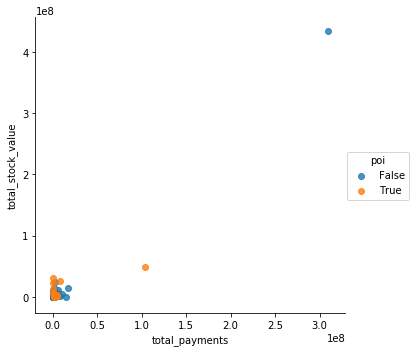

In [176]:
sns.lmplot(x='total_payments',y='total_stock_value',hue='poi',data = enron_data,fit_reg=False)

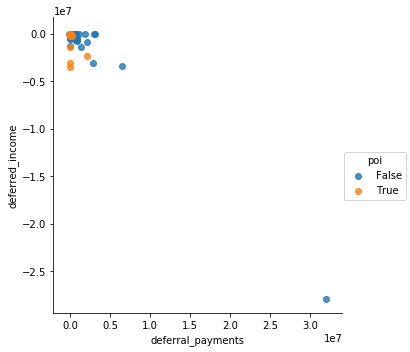

In [177]:
sns.lmplot(data = enron_data,x = 'deferral_payments',y = 'deferred_income', hue='poi',fit_reg=False)

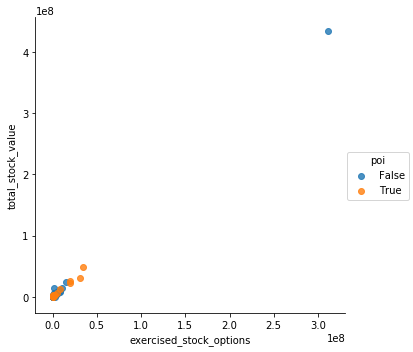

In [178]:
sns.lmplot(data = enron_data,x = 'exercised_stock_options',y = 'total_stock_value', hue='poi',fit_reg=False)

I guess that these two variables are linearly correlated. Let's check their correlation.

In [179]:
from scipy.stats.stats import pearsonr 
pearsonr(enron_data.total_stock_value,enron_data.exercised_stock_options)

(0.99879383111440811, 2.1837481664949065e-190)

##### We can see these two variables are highly correlated. Hence we can remove one of them later in feature selection.

Let's move on.

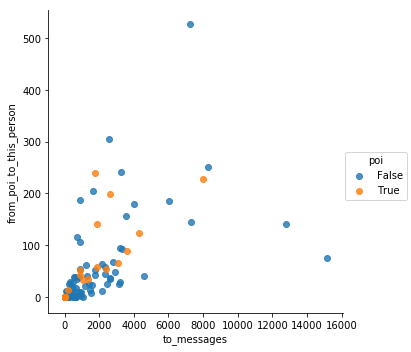

In [180]:
sns.lmplot(data=enron_data, x = 'to_messages',y = 'from_poi_to_this_person', hue = 'poi',fit_reg=False)

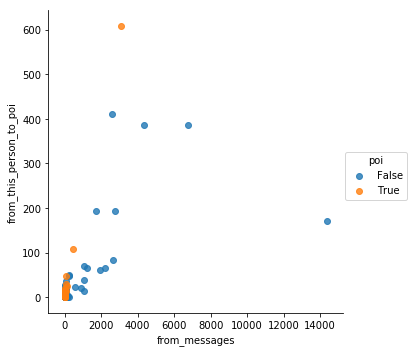

In [181]:
sns.lmplot(x = 'from_messages', y = 'from_this_person_to_poi',  hue = 'poi',data = enron_data,fit_reg=False)

### Removing outlier

Upon inspection I found that our dataset had a TOTAL field, which was resulting in outlier.

In [182]:
enron_data.loc['TOTAL']

bonus                        9.73436e+07
deferral_payments            3.20834e+07
deferred_income             -2.79929e+07
director_fees                1.39852e+06
exercised_stock_options      3.11764e+08
expenses                      5.2352e+06
from_messages                          0
from_poi_to_this_person                0
from_this_person_to_poi                0
loan_advances                 8.3925e+07
long_term_incentive          4.85219e+07
other                        4.26676e+07
poi                                False
restricted_stock             1.30322e+08
restricted_stock_deferred   -7.57679e+06
salary                       2.67042e+07
shared_receipt_with_poi                0
to_messages                            0
total_payments               3.09887e+08
total_stock_value             4.3451e+08
email_address                        NaN
Name: TOTAL, dtype: object

In [183]:
## Removing
enron_data.drop('TOTAL',inplace=True)

Other outliers were kept, since they belong to 'poi' class and hence removing them would not be suitable.

## Feature Selection

We saw earlier that  exercised_stock_options and total_stock_value are linearly correlated. Hence we can remove one of them. I kept total_stock_value.

We will also remove email_address variable, since it doesn't help in processing/identifying poi.

In [185]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [186]:
target = enron_data['poi']
enron_data.drop('poi',axis=1,inplace=True)
enron_data.drop('email_address',axis=1,inplace=True)
enron_data.drop('exercised_stock_options',axis=1,inplace=True)
enron_data.head()

bonus  deferral_payments  deferred_income  \
ALLEN PHILLIP K     4175000.0          2869717.0       -3081055.0   
BADUM JAMES P             0.0           178980.0              0.0   
BANNANTINE JAMES M        0.0                0.0          -5104.0   
BAXTER JOHN C       1200000.0          1295738.0       -1386055.0   
BAY FRANKLIN R       400000.0           260455.0        -201641.0   

                    director_fees  expenses  from_messages  \
ALLEN PHILLIP K               0.0   13868.0         2195.0   
BADUM JAMES P                 0.0    3486.0            0.0   
BANNANTINE JAMES M            0.0   56301.0           29.0   
BAXTER JOHN C                 0.0   11200.0            0.0   
BAY FRANKLIN R                0.0  129142.0            0.0   

                    from_poi_to_this_person  from_this_person_to_poi  \
ALLEN PHILLIP K                        47.0                     65.0   
BADUM JAMES P                           0.0                      0.0   
BANNANTINE JAMES M                     39.0                      0.0   
BAXTER JOHN C                           0.0                      0.0   
BAY FRANKLIN R                          0.0                      0.0   

                    loan_advances  long_term_incentive      other  \
ALLEN PHILLIP K               0.0             304805.0      152.0   
BADUM JAMES P                 0.0                  0.0        0.0   
BANNANTINE JAMES M            0.0                  0.0   864523.0   
BAXTER JOHN C                 0.0            1586055.0  2660303.0   
BAY FRANKLIN R                0.0                  0.0       69.0   

                    restricted_stock  restricted_stock_deferred    salary  \
ALLEN PHILLIP K             126027.0                  -126027.0  201955.0   
BADUM JAMES P                    0.0                        0.0       0.0   
BANNANTINE JAMES M         1757552.0                  -560222.0     477.0   
BAXTER JOHN C              3942714.0                        0.0  267102.0   
BAY FRANKLIN R              145796.0                   -82782.0  239671.0   

                    shared_receipt_with_poi  to_messages  total_payments  \
ALLEN PHILLIP K                      1407.0       2902.0       4484442.0   
BADUM JAMES P                           0.0          0.0        182466.0   
BANNANTINE JAMES M                    465.0        566.0        916197.0   
BAXTER JOHN C                           0.0          0.0       5634343.0   
BAY FRANKLIN R                          0.0          0.0        827696.0   

                    total_stock_value  
ALLEN PHILLIP K             1729541.0  
BADUM JAMES P                257817.0  
BANNANTINE JAMES M          5243487.0  
BAXTER JOHN C              10623258.0  
BAY FRANKLIN R                63014.0

### 1. New features

All these features are ratio of two variables. I used them because a ratio depicts more cleary what a feature  is expressing, and most importantly it is  scaled. So, large values can be brought down with keeping their information intact.

In [187]:
import numpy as np
def compute_fraction(ser1,ser2):
    """
    This function takes in two pandas series and simply return fraction of these two.
    """
    return 1.*ser1 / ser2

In [188]:
enron_data['fraction_from_poi'] = compute_fraction(enron_data['from_poi_to_this_person'],enron_data['to_messages'])
enron_data['fraction_to_poi'] = compute_fraction(enron_data['from_this_person_to_poi'],enron_data['from_messages'])
enron_data['expenses_salary_ratio'] = compute_fraction(enron_data['expenses'],enron_data['salary'])
enron_data['bonus_salary_ratio'] = compute_fraction(enron_data['bonus'],enron_data['salary'])

In [189]:
enron_data.replace([np.inf,-np.inf],np.nan,inplace=True)
enron_data.fillna(0,inplace=True)

In [190]:
enron_data.head()

bonus  deferral_payments  deferred_income  \
ALLEN PHILLIP K     4175000.0          2869717.0       -3081055.0   
BADUM JAMES P             0.0           178980.0              0.0   
BANNANTINE JAMES M        0.0                0.0          -5104.0   
BAXTER JOHN C       1200000.0          1295738.0       -1386055.0   
BAY FRANKLIN R       400000.0           260455.0        -201641.0   

                    director_fees  expenses  from_messages  \
ALLEN PHILLIP K               0.0   13868.0         2195.0   
BADUM JAMES P                 0.0    3486.0            0.0   
BANNANTINE JAMES M            0.0   56301.0           29.0   
BAXTER JOHN C                 0.0   11200.0            0.0   
BAY FRANKLIN R                0.0  129142.0            0.0   

                    from_poi_to_this_person  from_this_person_to_poi  \
ALLEN PHILLIP K                        47.0                     65.0   
BADUM JAMES P                           0.0                      0.0   
BANNANTINE JAMES M                     39.0                      0.0   
BAXTER JOHN C                           0.0                      0.0   
BAY FRANKLIN R                          0.0                      0.0   

                    loan_advances  long_term_incentive         ...          \
ALLEN PHILLIP K               0.0             304805.0         ...           
BADUM JAMES P                 0.0                  0.0         ...           
BANNANTINE JAMES M            0.0                  0.0         ...           
BAXTER JOHN C                 0.0            1586055.0         ...           
BAY FRANKLIN R                0.0                  0.0         ...           

                    restricted_stock_deferred    salary  \
ALLEN PHILLIP K                     -126027.0  201955.0   
BADUM JAMES P                             0.0       0.0   
BANNANTINE JAMES M                  -560222.0     477.0   
BAXTER JOHN C                             0.0  267102.0   
BAY FRANKLIN R                       -82782.0  239671.0   

                    shared_receipt_with_poi  to_messages  total_payments  \
ALLEN PHILLIP K                      1407.0       2902.0       4484442.0   
BADUM JAMES P                           0.0          0.0        182466.0   
BANNANTINE JAMES M                    465.0        566.0        916197.0   
BAXTER JOHN C                           0.0          0.0       5634343.0   
BAY FRANKLIN R                          0.0          0.0        827696.0   

                    total_stock_value  fraction_from_poi  fraction_to_poi  \
ALLEN PHILLIP K             1729541.0           0.016196         0.029613   
BADUM JAMES P                257817.0           0.000000         0.000000   
BANNANTINE JAMES M          5243487.0           0.068905         0.000000   
BAXTER JOHN C              10623258.0           0.000000         0.000000   
BAY FRANKLIN R                63014.0           0.000000         0.000000   

                    expenses_salary_ratio  bonus_salary_ratio  
ALLEN PHILLIP K                  0.068669           20.672922  
BADUM JAMES P                    0.000000            0.000000  
BANNANTINE JAMES M             118.031447            0.000000  
BAXTER JOHN C                    0.041932            4.492666  
BAY FRANKLIN R                   0.538830            1.668955  

[5 rows x 22 columns]

In [191]:
(enron_data==0.0).sum().sort_values(ascending=False)

loan_advances                142
director_fees                129
restricted_stock_deferred    128
deferral_payments            107
deferred_income               97
long_term_incentive           80
fraction_to_poi               79
from_this_person_to_poi       79
fraction_from_poi             71
from_poi_to_this_person       71
bonus_salary_ratio            64
bonus                         64
expenses_salary_ratio         64
shared_receipt_with_poi       59
from_messages                 59
to_messages                   59
other                         53
salary                        51
expenses                      51
restricted_stock              36
total_payments                21
total_stock_value             20
dtype: int64

We can see that director fees, loan advances, restricted_stock_deferred contains almost zero values. Hence, they are no use to our classifier. Therefore we can remove them. 

In [192]:
cols_to_remove = ['director_fees', 'loan_advances','restricted_stock_deferred']
enron_data.drop(cols_to_remove,axis=1,inplace=True)


In [193]:
enron_data.head()

bonus  deferral_payments  deferred_income  expenses  \
ALLEN PHILLIP K     4175000.0          2869717.0       -3081055.0   13868.0   
BADUM JAMES P             0.0           178980.0              0.0    3486.0   
BANNANTINE JAMES M        0.0                0.0          -5104.0   56301.0   
BAXTER JOHN C       1200000.0          1295738.0       -1386055.0   11200.0   
BAY FRANKLIN R       400000.0           260455.0        -201641.0  129142.0   

                    from_messages  from_poi_to_this_person  \
ALLEN PHILLIP K            2195.0                     47.0   
BADUM JAMES P                 0.0                      0.0   
BANNANTINE JAMES M           29.0                     39.0   
BAXTER JOHN C                 0.0                      0.0   
BAY FRANKLIN R                0.0                      0.0   

                    from_this_person_to_poi  long_term_incentive      other  \
ALLEN PHILLIP K                        65.0             304805.0      152.0   
BADUM JAMES P                           0.0                  0.0        0.0   
BANNANTINE JAMES M                      0.0                  0.0   864523.0   
BAXTER JOHN C                           0.0            1586055.0  2660303.0   
BAY FRANKLIN R                          0.0                  0.0       69.0   

                    restricted_stock    salary  shared_receipt_with_poi  \
ALLEN PHILLIP K             126027.0  201955.0                   1407.0   
BADUM JAMES P                    0.0       0.0                      0.0   
BANNANTINE JAMES M         1757552.0     477.0                    465.0   
BAXTER JOHN C              3942714.0  267102.0                      0.0   
BAY FRANKLIN R              145796.0  239671.0                      0.0   

                    to_messages  total_payments  total_stock_value  \
ALLEN PHILLIP K          2902.0       4484442.0          1729541.0   
BADUM JAMES P               0.0        182466.0           257817.0   
BANNANTINE JAMES M        566.0        916197.0          5243487.0   
BAXTER JOHN C               0.0       5634343.0         10623258.0   
BAY FRANKLIN R              0.0        827696.0            63014.0   

                    fraction_from_poi  fraction_to_poi  expenses_salary_ratio  \
ALLEN PHILLIP K              0.016196         0.029613               0.068669   
BADUM JAMES P                0.000000         0.000000               0.000000   
BANNANTINE JAMES M           0.068905         0.000000             118.031447   
BAXTER JOHN C                0.000000         0.000000               0.041932   
BAY FRANKLIN R               0.000000         0.000000               0.538830   

                    bonus_salary_ratio  
ALLEN PHILLIP K              20.672922  
BADUM JAMES P                 0.000000  
BANNANTINE JAMES M            0.000000  
BAXTER JOHN C                 4.492666  
BAY FRANKLIN R                1.668955

### 2. Scaling

In [194]:
def scaleFeatures(arr):
    max_v = arr.max()
    min_v = arr.min()
    if max_v == min_v:
            arr = arr / min_v
    else:
        arr = (arr - min_v)/(max_v - min_v) 
    return arr  

In [195]:
enron_data = enron_data.apply(scaleFeatures)

### 3. Testing new features created

I will here use Adaboost classifier to test the feature importances on out of the box classifier without hyper parameter tuning.

In [196]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(enron_data,target)
cols = enron_data.columns
imp = adb.feature_importances_
for i in range(len(imp)):
    print cols[i] + "------------" + str(imp[i])

bonus------------0.04
deferral_payments------------0.0
deferred_income------------0.08
expenses------------0.1
from_messages------------0.02
from_poi_to_this_person------------0.0
from_this_person_to_poi------------0.0
long_term_incentive------------0.04
other------------0.14
restricted_stock------------0.12
salary------------0.02
shared_receipt_with_poi------------0.12
to_messages------------0.04
total_payments------------0.02
total_stock_value------------0.04
fraction_from_poi------------0.06
fraction_to_poi------------0.08
expenses_salary_ratio------------0.04
bonus_salary_ratio------------0.04


We can see that our  engineered features are performing good with respect to others. Although the score for each feature is less, but still our features match up to the already given features.

In [197]:
d2 = enron_data
d2['poi'] = target
d2 = d2.T
my_dataset = d2.to_dict()
with open("my_dataset.pkl", "w") as dataset_outfile:
        pickle.dump(my_dataset, dataset_outfile)

In [200]:
enron_data.drop('poi',axis=1,inplace=True)
enron_data.head()

bonus  deferral_payments  deferred_income  expenses  \
ALLEN PHILLIP K     0.521875           0.455199         0.120800  0.060622   
BADUM JAMES P       0.000000           0.043109         1.000000  0.015238   
BANNANTINE JAMES M  0.000000           0.015698         0.998544  0.246111   
BAXTER JOHN C       0.150000           0.214142         0.604480  0.048959   
BAY FRANKLIN R      0.050000           0.055587         0.942460  0.564523   

                    from_messages  from_poi_to_this_person  \
ALLEN PHILLIP K          0.152770                 0.089015   
BADUM JAMES P            0.000000                 0.000000   
BANNANTINE JAMES M       0.002018                 0.073864   
BAXTER JOHN C            0.000000                 0.000000   
BAY FRANKLIN R           0.000000                 0.000000   

                    from_this_person_to_poi  long_term_incentive     other  \
ALLEN PHILLIP K                    0.106732             0.059238  0.000015   
BADUM JAMES P                      0.000000             0.000000  0.000000   
BANNANTINE JAMES M                 0.000000             0.000000  0.083450   
BAXTER JOHN C                      0.000000             0.308245  0.256793   
BAY FRANKLIN R                     0.000000             0.000000  0.000007   

                    restricted_stock    salary  shared_receipt_with_poi  \
ALLEN PHILLIP K             0.157232  0.181735                 0.254845   
BADUM JAMES P               0.149975  0.000000                 0.000000   
BANNANTINE JAMES M          0.251180  0.000429                 0.084224   
BAXTER JOHN C               0.377009  0.240360                 0.000000   
BAY FRANKLIN R              0.158370  0.215675                 0.000000   

                    to_messages  total_payments  total_stock_value  \
ALLEN PHILLIP K        0.191564        0.043303           0.036083   
BADUM JAMES P          0.000000        0.001762           0.006142   
BANNANTINE JAMES M     0.037362        0.008847           0.107571   
BAXTER JOHN C          0.000000        0.054407           0.217018   
BAY FRANKLIN R         0.000000        0.007992           0.002179   

                    fraction_from_poi  fraction_to_poi  expenses_salary_ratio  \
ALLEN PHILLIP K              0.074518         0.029613               0.000582   
BADUM JAMES P                0.000000         0.000000               0.000000   
BANNANTINE JAMES M           0.317034         0.000000               1.000000   
BAXTER JOHN C                0.000000         0.000000               0.000355   
BAY FRANKLIN R               0.000000         0.000000               0.004565   

                    bonus_salary_ratio  
ALLEN PHILLIP K               0.842664  
BADUM JAMES P                 0.000000  
BANNANTINE JAMES M            0.000000  
BAXTER JOHN C                 0.183129  
BAY FRANKLIN R                0.068029

## Algorithm Selection 

In this section , we are going to try out different possible algorithms with  changing parameters using GridSearchCV . We will take only those features and algo where best recall score given by gridsearch is maximum.

In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score,make_scorer


scoring = {'R':'recall', 'P':'precision'}

'''This function used grid search to train different classifiers and return the best one'''
def train_algo(algo,params,train_data,train_labels):   
    clf = GridSearchCV(algo,param_grid=params,scoring=scoring,refit='R')
    clf.fit(train_data,train_labels)
    return clf

'''This function takes in a k value and select k best features of the data provided'''
def select_k_best(k,data,labels):
    k_best = SelectKBest(k=k)
    data = k_best.fit_transform(data,labels)
    return data,labels,k_best.get_support()


In [202]:
def main(classifier,params,new_data,target):
    #k_values = [2,5,7,10,14,18,'all']
    for i in range(19):
        data,labels,mask= select_k_best(i+1,new_data,target)
        #X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=0)
        clf = train_algo(classifier,params,data,labels)
        print 'k: {} \nBest Parameter: {}\nBest Score: {}'.format(i+1,clf.best_params_,clf.best_score_)
        f_list = [f for f in new_data.columns[mask]]
        print 'Features Selected: {}\n\n'.format(f_list)
        print "-----------------------------------------------------------------------------------------"

#### 1. Support Vector Machines

In [203]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
params = {'C': [1, 10, 50,100],
          'gamma': [0.001,0.0001,0.002,0.005], 
          'kernel': ['linear','rbf']}
main(svc,params,enron_data,target)

k: 1 
Best Parameter: {'kernel': 'linear', 'C': 100, 'gamma': 0.001}
Best Score: 0.0551724137931
Features Selected: ['total_stock_value']


-----------------------------------------------------------------------------------------
k: 2 
Best Parameter: {'kernel': 'linear', 'C': 1, 'gamma': 0.001}
Best Score: 0.0
Features Selected: ['bonus', 'total_stock_value']


-----------------------------------------------------------------------------------------
k: 3 
Best Parameter: {'kernel': 'linear', 'C': 1, 'gamma': 0.001}
Best Score: 0.0
Features Selected: ['bonus', 'salary', 'total_stock_value']


-----------------------------------------------------------------------------------------
k: 4 
Best Parameter: {'kernel': 'linear', 'C': 1, 'gamma': 0.001}
Best Score: 0.0
Features Selected: ['bonus', 'salary', 'total_stock_value', 'fraction_to_poi']


-----------------------------------------------------------------------------------------
k: 5 
Best Parameter: {'kernel': 'linear', 'C': 1, 'gamm

#### 2. Decision Tree Classifier

In [204]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
params = {'min_samples_split':[2,5,10,15,20,50,70,100],
         'max_depth':[2,5,7,10,14],
         }
main(clf_tree,params,enron_data,target)

k: 1 
Best Parameter: {'min_samples_split': 2, 'max_depth': 10}
Best Score: 0.277011494253
Features Selected: ['total_stock_value']


-----------------------------------------------------------------------------------------
k: 2 
Best Parameter: {'min_samples_split': 2, 'max_depth': 7}
Best Score: 0.27816091954
Features Selected: ['bonus', 'total_stock_value']


-----------------------------------------------------------------------------------------
k: 3 
Best Parameter: {'min_samples_split': 2, 'max_depth': 7}
Best Score: 0.277011494253
Features Selected: ['bonus', 'salary', 'total_stock_value']


-----------------------------------------------------------------------------------------
k: 4 
Best Parameter: {'min_samples_split': 2, 'max_depth': 5}
Best Score: 0.333333333333
Features Selected: ['bonus', 'salary', 'total_stock_value', 'fraction_to_poi']


-----------------------------------------------------------------------------------------
k: 5 
Best Parameter: {'min_samples_split'

#### 3. Random Forest Classifier

In [205]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier()
params = {'n_estimators':[10,20,30,40,50,60,100],
         'min_samples_split':[2,5,10,15,20,30,50],
         }
main(rfc_clf,params,enron_data,target)

k: 1 
Best Parameter: {'min_samples_split': 2, 'n_estimators': 10}
Best Score: 0.332183908046
Features Selected: ['total_stock_value']


-----------------------------------------------------------------------------------------
k: 2 
Best Parameter: {'min_samples_split': 2, 'n_estimators': 10}
Best Score: 0.220689655172
Features Selected: ['bonus', 'total_stock_value']


-----------------------------------------------------------------------------------------
k: 3 
Best Parameter: {'min_samples_split': 5, 'n_estimators': 10}
Best Score: 0.165517241379
Features Selected: ['bonus', 'salary', 'total_stock_value']


-----------------------------------------------------------------------------------------
k: 4 
Best Parameter: {'min_samples_split': 5, 'n_estimators': 10}
Best Score: 0.277011494253
Features Selected: ['bonus', 'salary', 'total_stock_value', 'fraction_to_poi']


-----------------------------------------------------------------------------------------
k: 5 
Best Parameter: {'mi

#### 4. Naive Bayes Classifier

In [206]:
### NO parameters for this. We will train it out of the box.
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
params = {}
main(nb_clf,params,enron_data,target)

k: 1 
Best Parameter: {}
Best Score: 0.275862068966
Features Selected: ['total_stock_value']


-----------------------------------------------------------------------------------------
k: 2 
Best Parameter: {}
Best Score: 0.332183908046
Features Selected: ['bonus', 'total_stock_value']


-----------------------------------------------------------------------------------------
k: 3 
Best Parameter: {}
Best Score: 0.332183908046
Features Selected: ['bonus', 'salary', 'total_stock_value']


-----------------------------------------------------------------------------------------
k: 4 
Best Parameter: {}
Best Score: 0.387356321839
Features Selected: ['bonus', 'salary', 'total_stock_value', 'fraction_to_poi']


-----------------------------------------------------------------------------------------
k: 5 
Best Parameter: {}
Best Score: 0.387356321839
Features Selected: ['bonus', 'deferred_income', 'salary', 'total_stock_value', 'fraction_to_poi']


------------------------------------------

#### 4. Adaboost Classifier

In [207]:
from sklearn.ensemble import AdaBoostClassifier
adb_clf = AdaBoostClassifier()
params = {'n_estimators':[1,10,20,50,100,150,200,500],
         'learning_rate':[1,0.9,0.8,0.5,0.3],
         'algorithm':['SAMME.R']}
main(adb_clf,params,enron_data,target)

k: 1 
Best Parameter: {'n_estimators': 100, 'learning_rate': 1, 'algorithm': 'SAMME.R'}
Best Score: 0.332183908046
Features Selected: ['total_stock_value']


-----------------------------------------------------------------------------------------
k: 2 
Best Parameter: {'n_estimators': 100, 'learning_rate': 1, 'algorithm': 'SAMME.R'}
Best Score: 0.332183908046
Features Selected: ['bonus', 'total_stock_value']


-----------------------------------------------------------------------------------------
k: 3 
Best Parameter: {'n_estimators': 200, 'learning_rate': 1, 'algorithm': 'SAMME.R'}
Best Score: 0.277011494253
Features Selected: ['bonus', 'salary', 'total_stock_value']


-----------------------------------------------------------------------------------------
k: 4 
Best Parameter: {'n_estimators': 150, 'learning_rate': 0.9, 'algorithm': 'SAMME.R'}
Best Score: 0.277011494253
Features Selected: ['bonus', 'salary', 'total_stock_value', 'fraction_to_poi']


------------------------------

From all the above classifiers we can see that Decision Tree performs well, w.r.t other classifiers. Hence this is our final model.

### Why is it important to fine tune parameters?
Parameters in a machine learning algorith are either to increase the predictive power of the model or to make it easier to train the model. Tuning these parameters can check for overfitting, increase the accuracy or relevant metrics for the algorithm.

### Evaluation Metrics

I used recall and precision measure to to fine tune my parameters. We were asked to achieve both these scores over 0.3 and my above code shows I fined tuned them and Decision tree with parameters as <b>{'min_samples_split': 2, 'max_depth': 14}</b> was able to achieve that and final features as <b>['bonus', 'deferred_income', 'long_term_incentive', 'restricted_stock', 'salary', 'total_stock_value', 'fraction_to_poi', 'bonus_salary_ratio']</b> . So I choose that as my final algorithm.

### Validation and It's importance
Cross-validation, sometimes called rotation estimation,is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (testing dataset). The goal of cross validation is to define a dataset to "test" the model in the training phase (i.e., the validation dataset), in order to limit problems like overfitting[citation needed], give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem), etc.

One of the main reasons for using cross-validation instead of using the conventional validation (e.g. partitioning the data set into two sets of 70% for training and 30% for test) is that there is not enough data available to partition it into separate training and test sets without losing significant modelling or testing capability. In these cases, a fair way to properly estimate model prediction performance is to use cross-validation as a powerful general technique.

### Validation Strategy

I used StratifiedShuffleSplit and normal cross_validation to validate the model. Cross validation is performed under Algorithm Selection section.

### Algorithm performance

Found using tester.py script


Accuracy: 0.82373	
Precision: 0.33124	
Recall: 0.31600	
F1: 0.32344	
F2: 0.31893
Total predictions: 15000	
True positives:  632	False positives: 1276	False negatives: 1368	True negatives: 11724